MLP - MNIST

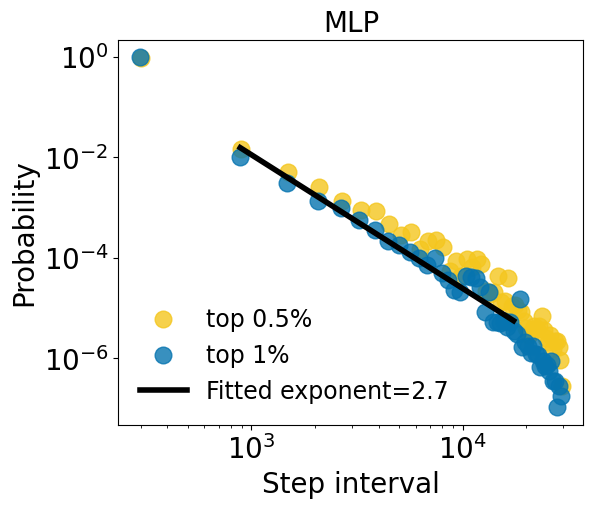

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import kstest

def plot_updates(data):
    nums, bins = np.histogram(data, bins=100)
    nums = nums/np.sum(nums)
    xbins = bins[:-1] + np.diff(bins)/2
    return nums, xbins

def power_law(x, a, C):
    return C * x ** (-a)

def power_law_cdf(x, alpha, xmin):
    return 1 - (xmin / x) ** (alpha - 1)


suffixes = ['5000-30000'] 
labelsize=20   
colorlist = ['#F4C61E','#0674B0']
for fname in ['interval']:
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    labelsize=20   
    colorlist = ['#F4C61E','#0674B0']
    for i, threshold in enumerate([99.5, 99]):
        for idx, suffix in enumerate(suffixes):
            st = int(suffix.split('-')[0])
            ed = int(suffix.split('-')[1])
            for opti in ['PureSGD']:
                lr = 0.01 
                xbins = np.load(f'interval_MNIST_MLP_{threshold}_optim{opti}_lr{lr}_steps{suffix}_xbins.npy')
                nums = np.load(f'interval_MNIST_MLP_{threshold}_optim{opti}_lr{lr}_steps{suffix}_nums.npy')

                if threshold == 99.5:
                    ax.loglog(xbins, nums,  'o',markersize=12, alpha=0.8, color=colorlist[i], label=f'top 0.5%')
                elif threshold == 99:
                    ax.loglog(xbins, nums, 'o',markersize=12,  alpha=0.8, color=colorlist[i], label=f'top 1%')

    valid = nums > 0
    xbins_fit = xbins[valid]
    nums_fit = nums[valid]
    xbins_fit = xbins_fit[1:-20]
    nums_fit = nums_fit[1:-20]
    log_x = np.log(xbins_fit)
    log_y = np.log(nums_fit)

    slope, intercept = np.polyfit(log_x, log_y, 1)
    alpha = -slope  
    C_fit = np.exp(intercept)


    xbins = np.linspace(min(xbins_fit), max(xbins_fit), 100) 
    model_fit = C_fit * xbins ** (-alpha)

    ax.loglog(xbins, model_fit, 
            '-', color='k', linewidth=4, label=f'Fitted exponent={alpha:.1f}')


    if fname == 'interval':
        ax.set_xlabel(f'Step interval', fontsize=labelsize)
    ax.set_ylabel('Probability',fontsize=labelsize)
    ax.legend(fontsize=labelsize-3, frameon=False)
    ax.set_title(f'MLP', fontsize=labelsize)
    ax.xaxis.set_tick_params(labelsize=labelsize)
    ax.yaxis.set_tick_params(labelsize=labelsize)

    plt.show()


CNN - CIFAR

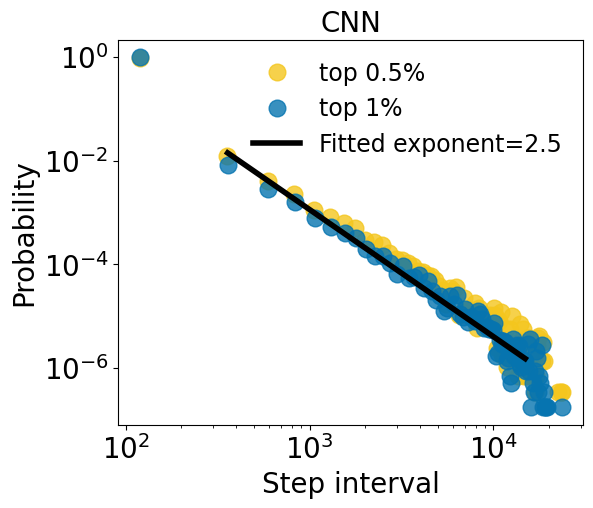

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import kstest


suffixes = ['200-30000'] 
for fname in ['interval']:
    fig, ax = plt.subplots(1, 1, figsize=(6, 5))
    labelsize=20   
    colorlist = ['#F4C61E','#0674B0']
    for i, threshold in enumerate([99.5, 99]):
        for idx, suffix in enumerate(suffixes):
            st = int(suffix.split('-')[0])
            ed = int(suffix.split('-')[1])
            for opti in ['PureSGD']:
                lr = 0.01
                xbins = np.load(f'interval_CIFAR_CNN_{threshold}_optim{opti}_lr{lr}_steps{suffix}_xbins.npy')
                nums = np.load(f'interval_CIFAR_CNN_{threshold}_optim{opti}_lr{lr}_steps{suffix}_nums.npy')
                if threshold == 99.5:
                    ax.loglog(xbins, nums,  'o',markersize=12, alpha=0.8,color=colorlist[i], label=f'top 0.5%')
                elif threshold == 99:
                    ax.loglog(xbins, nums, 'o',markersize=12, alpha=0.8,color=colorlist[i], label=f'top 1%')

    valid = nums > 0
    xbins_fit = xbins[valid]
    nums_fit = nums[valid]
    xbins_fit = xbins_fit[1:-20]
    nums_fit = nums_fit[1:-20]
    log_x = np.log(xbins_fit)
    log_y = np.log(nums_fit)

    slope, intercept = np.polyfit(log_x, log_y, 1)
    alpha = -slope  
    C_fit = np.exp(intercept)


    xbins = np.linspace(min(xbins_fit), max(xbins_fit), 100) 
    model_fit = C_fit * xbins ** (-alpha)

    ax.loglog(xbins, model_fit, 
            '-', color='k', linewidth=4, label=f'Fitted exponent={alpha:.1f}')

    if fname == 'interval':
        ax.set_xlabel(f'Step interval', fontsize=labelsize)
    ax.set_ylabel('Probability',fontsize=labelsize)
    ax.legend(fontsize=labelsize-3, frameon=False)
    ax.set_title(f'CNN', fontsize=labelsize)
    ax.xaxis.set_tick_params(labelsize=labelsize)
    ax.yaxis.set_tick_params(labelsize=labelsize)

    plt.show()
